<a href="https://colab.research.google.com/github/jobizzz/Vehicle-part-cost-predictor/blob/main/PartCostPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd

# Read the Excel file
data = pd.read_excel('/content/sample_data/FinancePS.xlsx', sheet_name='Data')


In [141]:
#print data in a table format

print(data.to_string())


    Programme  Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  Job 1 Date Country of production  Vehicle Volume   Number of parts within construction  Total Cost  Total Cost_1
0   New car 1       0.840               0.0000                0.170             0.00        2026                    UK            30000                                    2       20.15           NaN
1   New Car 2       1.600               0.0000                0.170             0.00        2027                    UK            80000                                    2       26.70           NaN
2   New Car 3       2.100               0.1350                0.115             0.00        2027                    UK            35000                                    4       38.35           NaN
3        L663       1.640               0.2800                0.000             0.00        2017                   SVK            70000                                    2         NaN         23.46
4    

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Programme                            11 non-null     object 
 1   Total Mass                           11 non-null     float64
 2   Painted Body Colour                  11 non-null     float64
 3   Painted Gloss Black                  11 non-null     float64
 4   Grained plastic                      11 non-null     float64
 5   Job 1 Date                           11 non-null     int64  
 6   Country of production                11 non-null     object 
 7   Vehicle Volume                       11 non-null     int64  
 8   Number of parts within construction  11 non-null     int64  
 9   Total Cost                           6 non-null      float64
 10  Total Cost_1                         3 non-null      float64
dtypes: float64(6), int64(3), object(2)

In [143]:
# drop programme column from data_train

data.drop('Programme', axis=1, inplace=True)


In [144]:

# Split the data into two dataframes
data_train = data.iloc[:9]
actual_test = data.iloc[9:]

# Print the  rows of each dataframe
print(data_train.to_string())
print(actual_test.to_string())


   Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  Job 1 Date Country of production  Vehicle Volume   Number of parts within construction  Total Cost  Total Cost_1
0       0.840               0.0000                0.170             0.00        2026                    UK            30000                                    2       20.15           NaN
1       1.600               0.0000                0.170             0.00        2027                    UK            80000                                    2       26.70           NaN
2       2.100               0.1350                0.115             0.00        2027                    UK            35000                                    4       38.35           NaN
3       1.640               0.2800                0.000             0.00        2017                   SVK            70000                                    2         NaN         23.46
4       1.640               0.0000                0.000          

In [145]:

# Describe the data
data_train.describe().T


,count,mean,std,min,25%,50%,75%,max
Total Mass,9.0,1.475111,0.346670,0.84,1.300,1.546,1.6400,2.10
Painted Body Colour,9.0,0.114611,0.119392,0.00,0.000,0.135,0.2100,0.28
Painted Gloss Black,9.0,0.097111,0.085316,0.00,0.050,0.060,0.1700,0.25
Grained plastic,9.0,0.031111,0.093333,0.00,0.000,0.000,0.0000,0.28
Job 1 Date,9.0,2020.777778,4.737557,2016.00,2017.000,2020.000,2026.0000,2027.00
Vehicle Volume,9.0,53888.888889,18671.130419,30000.00,40000.000,50000.000,70000.0000,80000.00
Number of parts within construction,9.0,2.555556,0.726483,2.00,2.000,2.000,3.0000,4.00
Total Cost,6.0,26.553333,7.506639,19.10,20.815,24.755,30.8325,38.35
Total Cost_1,3.0,18.416667,6.741263,10.76,15.895,21.030,22.2450,23.46


In [146]:
#data types of columns

data_train.dtypes


Total Mass                             float64
Painted Body Colour                    float64
Painted Gloss Black                    float64
Grained plastic                        float64
Job 1 Date                               int64
Country of production                   object
Vehicle Volume                           int64
Number of parts within construction      int64
Total Cost                             float64
Total Cost_1                           float64
dtype: object

In [147]:
# if total cost is null then convert to euro in total cost1  to pound and fill

import numpy as np

# Check if total_cost is null
is_null = data_train['Total Cost'].isnull()

# Convert euro to pound for null values
data_train.loc[is_null, 'Total Cost'] = data_train.loc[is_null, 'Total Cost_1'] * 0.85

# Drop the total_cost1 column
data_train.drop('Total Cost_1', axis=1, inplace=True)

# Print the first five rows of the updated data_train
print(data_train.to_string())


   Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  Job 1 Date Country of production  Vehicle Volume   Number of parts within construction  Total Cost
0       0.840               0.0000                0.170             0.00        2026                    UK            30000                                    2     20.1500
1       1.600               0.0000                0.170             0.00        2027                    UK            80000                                    2     26.7000
2       2.100               0.1350                0.115             0.00        2027                    UK            35000                                    4     38.3500
3       1.640               0.2800                0.000             0.00        2017                   SVK            70000                                    2     19.9410
4       1.640               0.0000                0.000             0.28        2017                   SVK            70000            

<ipython-input-147-70f95ad6fff0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop('Total Cost_1', axis=1, inplace=True)


In [148]:
print(data_train['Total Cost'])

0    20.1500
1    26.7000
2    38.3500
3    19.9410
4     9.1460
5    19.1000
6    17.8755
7    32.2100
8    22.8100
Name: Total Cost, dtype: float64


In [149]:
#convert categorical variables into number consistent across train and test

# Define a dictionary to map categorical values to numerical values
mapping = {
    'UK': 0,
    'SVK': 1
}

# Apply the mapping to both data_train and actual_test
for df in [data_train, actual_test]:
    for column in df.select_dtypes(include='object').columns:
        df[column] = df[column].map(mapping)

# Check the updated dataframes
print(data_train.to_string())
print(actual_test.to_string())


   Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  Job 1 Date  Country of production  Vehicle Volume   Number of parts within construction  Total Cost
0       0.840               0.0000                0.170             0.00        2026                      0            30000                                    2     20.1500
1       1.600               0.0000                0.170             0.00        2027                      0            80000                                    2     26.7000
2       2.100               0.1350                0.115             0.00        2027                      0            35000                                    4     38.3500
3       1.640               0.2800                0.000             0.00        2017                      1            70000                                    2     19.9410
4       1.640               0.0000                0.000             0.28        2017                      1            70000      

<ipython-input-149-676d6ab10904>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(mapping)
<ipython-input-149-676d6ab10904>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(mapping)


In [150]:
#  drop 2 columns

actual_test.drop(['Total Cost','Total Cost_1'], axis=1, inplace=True)
print(actual_test.to_string())


    Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  Job 1 Date  Country of production  Vehicle Volume   Number of parts within construction
9          1.7                 0.10                  0.1              0.0        2028                      0            40000                                    3
10         1.5                 0.19                  0.0              0.0        2028                      0            60000                                    2


<ipython-input-150-e490a233ba24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_test.drop(['Total Cost','Total Cost_1'], axis=1, inplace=True)


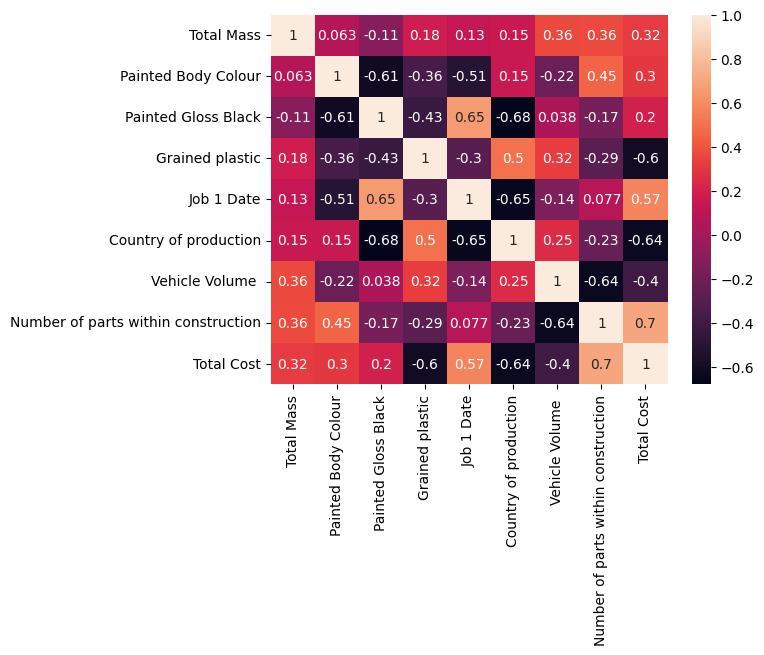

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data_train.corr(), annot=True)
plt.show()

In [153]:
# prompt: coorelation value with total cost

data_train.corr()['Total Cost'].sort_values(ascending=False)


Total Cost                             1.000000
Number of parts within construction    0.704120
Job 1 Date                             0.570521
Total Mass                             0.315915
Painted Body Colour                    0.303791
Painted Gloss Black                    0.197238
Vehicle Volume                        -0.404427
Grained plastic                       -0.604042
Country of production                 -0.637280
Name: Total Cost, dtype: float64

In [154]:
# Define features and target
features = data_train.drop(columns=['Total Cost'])
target = data_train['Total Cost']

In [156]:
print(features.to_string())

   Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  Job 1 Date  Country of production  Vehicle Volume   Number of parts within construction
0       0.840               0.0000                0.170             0.00        2026                      0            30000                                    2
1       1.600               0.0000                0.170             0.00        2027                      0            80000                                    2
2       2.100               0.1350                0.115             0.00        2027                      0            35000                                    4
3       1.640               0.2800                0.000             0.00        2017                      1            70000                                    2
4       1.640               0.0000                0.000             0.28        2017                      1            70000                                    2
5       1.546               

In [73]:
print(target)

0    20.1500
1    26.7000
2    38.3500
3    19.9410
4     9.1460
5    19.1000
6    17.8755
7    32.2100
8    22.8100
Name: Total Cost, dtype: float64


In [74]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=30)


In [75]:
print(X_train)

   Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  \
1       1.600               0.0000                0.170             0.00   
2       2.100               0.1350                0.115             0.00   
0       0.840               0.0000                0.170             0.00   
4       1.640               0.0000                0.000             0.28   
6       1.350               0.1365                0.059             0.00   
7       1.260               0.2100                0.050             0.00   
8       1.300               0.2700                0.060             0.00   
5       1.546               0.0000                0.250             0.00   

   Job 1 Date  Country of production  Vehicle Volume   \
1        2027                      0            80000   
2        2027                      0            35000   
0        2026                      0            30000   
4        2017                      1            70000   
6        2016                 

In [76]:
print(X_test)

   Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  \
3        1.64                 0.28                  0.0              0.0   

   Job 1 Date  Country of production  Vehicle Volume   \
3        2017                      1            70000   

   Number of parts within construction  
3                                    2  


In [88]:
# prompt: improtance of varibales to predict total cost

importances = random_forest_regressor.feature_importances_

# Sort importances in descending order
sorted_importances = sorted(zip(importances, features.columns), reverse=True)

# Print the features and their importances
for importance, feature in sorted_importances:
    print(f"{feature}: {importance:.4f}")


Total Mass: 0.2567
Painted Gloss Black: 0.1549
Job 1 Date: 0.1331
Number of parts within construction: 0.1151
Vehicle Volume : 0.1077
Painted Body Colour: 0.1050
Country of production: 0.0753
Grained plastic: 0.0523


In [129]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'KNeighbors Regression','Bayesian Ridge Regression','Random Forest Regressor']
    #model_name_list = ['KNeighbors Regression']

    # Instantiate the models
    model1 = LinearRegression()
    model2 = KNeighborsRegressor(5)
    model3 = BayesianRidge()
    model4 = RandomForestRegressor()


    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4]):
    #for i, model in enumerate([ model2]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)


        # Metrics
        mae = np.mean(abs(predictions - y_test))
        #rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        rmse = mean_squared_error(y_test, predictions, squared=False)


        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]


    return results

In [160]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import BayesianRidge,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
results = evaluate(X_train, X_test, y_train, y_test)

In [161]:
results

,mae,rmse
Linear Regression,32.911749,32.911749
KNeighbors Regression,0.8147,0.8147
Bayesian Ridge Regression,0.038709,0.038709
Random Forest Regressor,1.430095,1.430095


In [158]:
model = BayesianRidge()
model.fit(X_train, y_train)
print("Predicted value", model.predict(X_test))
print("Actual value", y_test)

Predicted value [19.97970859]
Actual value 3    19.941
Name: Total Cost, dtype: float64


In [162]:
print(actual_test.to_string())
model.predict(actual_test)

    Total Mass  Painted Body Colour  Painted Gloss Black  Grained plastic  Job 1 Date  Country of production  Vehicle Volume   Number of parts within construction
9          1.7                 0.10                  0.1              0.0        2028                      0            40000                                    3
10         1.5                 0.19                  0.0              0.0        2028                      0            60000                                    2


array([25.46327932, 21.80760157])